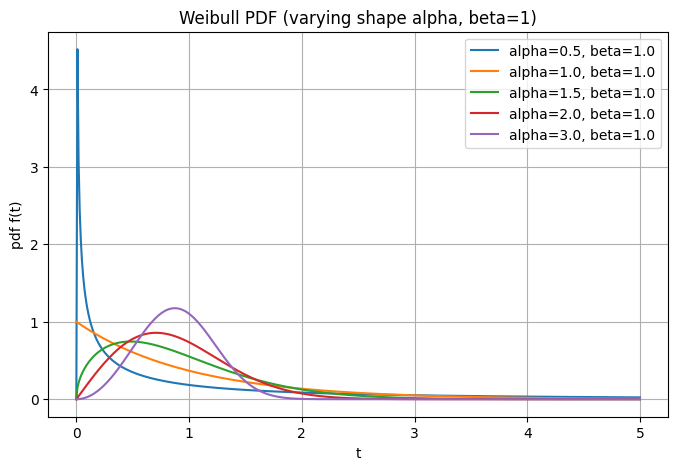

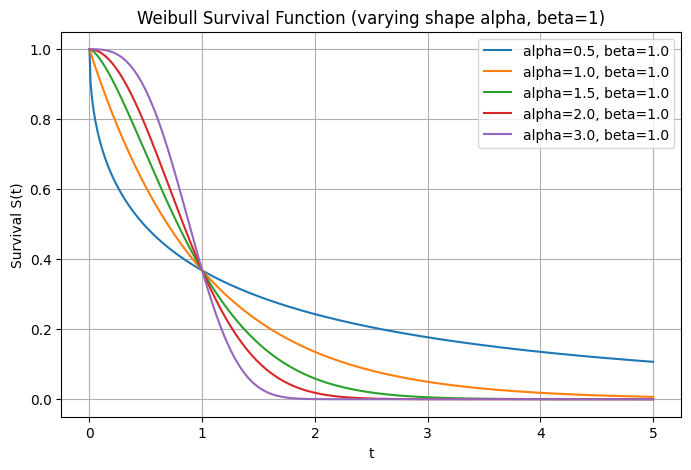

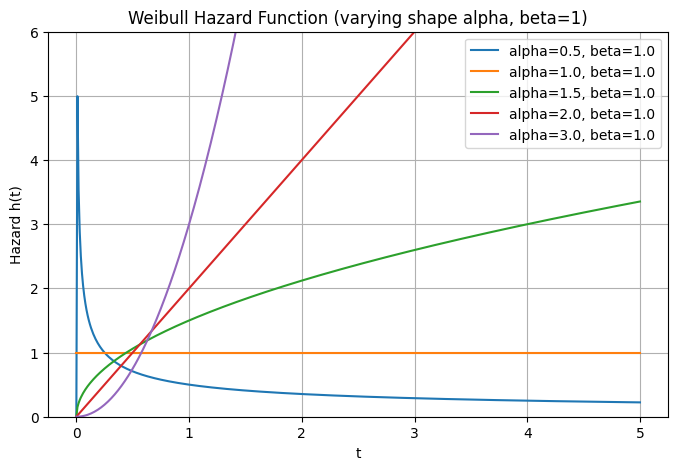

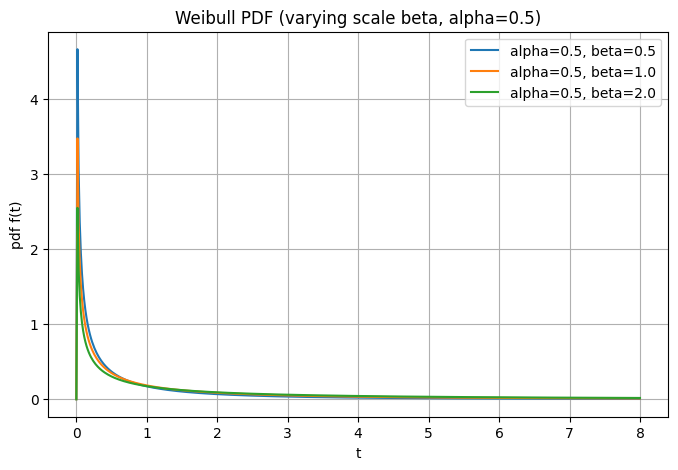

In [2]:
# Python code to plot Weibull PDF, Survival, and Hazard for different shape parameters (alpha).
# This will create three separate plots (one for PDF, one for Survival function, one for Hazard function).
# Rules: use matplotlib (no seaborn), each chart its own figure, don't set explicit colors/styles.

import numpy as np
import matplotlib.pyplot as plt

# t grid
t = np.linspace(0, 5, 500)

# parameter sets: vary shape (alpha), keep scale (beta) = 1
alphas = [0.5, 1.0, 1.5, 2.0, 3.0]
beta = 1.0

def weibull_pdf(t, alpha, beta):
    # pdf = (alpha/beta) * (t/beta)^(alpha-1) * exp(-(t/beta)^alpha)
    # handle t==0 for alpha<1: the formula yields 0 for t==0 when alpha>1, but for alpha<1 pdf->infty at 0;
    # numpy handles this; we'll set pdf(0)=0 for plotting clarity
    with np.errstate(divide='ignore', invalid='ignore'):
        pdf = (alpha / beta) * (t / beta)**(alpha - 1) * np.exp(-(t / beta)**alpha)
        pdf = np.where(np.isfinite(pdf), pdf, 0.0)
    return pdf

def weibull_survival(t, alpha, beta):
    return np.exp(-(t / beta)**alpha)

def weibull_hazard(t, alpha, beta):
    # h(t) = alpha/beta * (t/beta)^(alpha-1)
    with np.errstate(divide='ignore', invalid='ignore'):
        h = (alpha / beta) * (t / beta)**(alpha - 1)
        h = np.where(np.isfinite(h), h, 0.0)
    return h

# 1) PDF plot
plt.figure(figsize=(8,5))
for a in alphas:
    plt.plot(t, weibull_pdf(t, a, beta), label=f"alpha={a}, beta={beta}")
plt.xlabel("t")
plt.ylabel("pdf f(t)")
plt.title("Weibull PDF (varying shape alpha, beta=1)")
plt.legend()
plt.grid(True)
plt.show()

# 2) Survival function plot
plt.figure(figsize=(8,5))
for a in alphas:
    plt.plot(t, weibull_survival(t, a, beta), label=f"alpha={a}, beta={beta}")
plt.xlabel("t")
plt.ylabel("Survival S(t)")
plt.title("Weibull Survival Function (varying shape alpha, beta=1)")
plt.legend()
plt.grid(True)
plt.show()

# 3) Hazard function plot
plt.figure(figsize=(8,5))
for a in alphas:
    plt.plot(t, weibull_hazard(t, a, beta), label=f"alpha={a}, beta={beta}")
plt.xlabel("t")
plt.ylabel("Hazard h(t)")
plt.title("Weibull Hazard Function (varying shape alpha, beta=1)")
plt.ylim(0, 6)  # keep y-limit reasonable for visualization
plt.legend()
plt.grid(True)
plt.show()

# Also show example for varying scale (beta) with fixed alpha
alphas2 = [0.5]  # fixed
betas = [0.5, 1.0, 2.0]
t2 = np.linspace(0, 8, 500)

plt.figure(figsize=(8,5))
for b in betas:
    plt.plot(t2, weibull_pdf(t2, alphas2[0], b), label=f"alpha={alphas2[0]}, beta={b}")
plt.xlabel("t")
plt.ylabel("pdf f(t)")
plt.title(f"Weibull PDF (varying scale beta, alpha={alphas2[0]})")
plt.legend()
plt.grid(True)
plt.show()


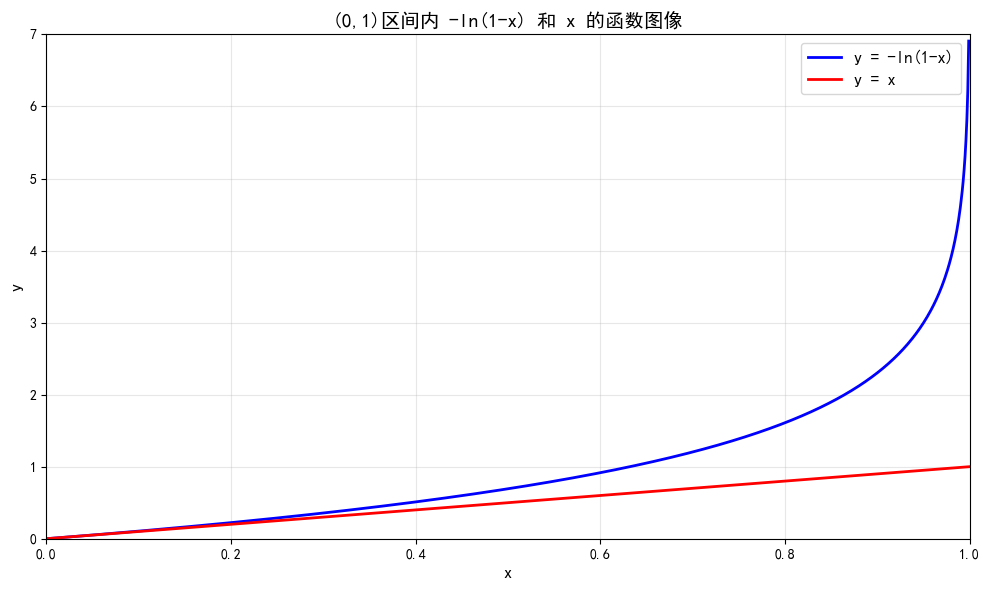

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 创建 x 值，从接近 0 到接近 1
x = np.linspace(0.001, 0.999, 1000)

# 计算函数值
y1 = -np.log(1 - x)  # -ln(1-x)
y2 = x  # y = x

# 创建图像
plt.figure(figsize=(10, 6))

# 绘制两条曲线
plt.plot(x, y1, label='y = -ln(1-x)', color='blue', linewidth=2)
plt.plot(x, y2, label='y = x', color='red', linewidth=2)

# 设置标题和标签
plt.title('(0,1)区间内 -ln(1-x) 和 x 的函数图像', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

# 添加网格
plt.grid(True, alpha=0.3)

# 添加图例
plt.legend(fontsize=12)

# 设置坐标轴范围
plt.xlim(0, 1)
plt.ylim(0, 7)  # 适当调整 y 轴范围以显示两条曲线

# 显示图像
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
df1 = pd.read_excel(r"E:\Y9000Xde\Codes\Python\markov_treeage\my_models\标准结果.xlsx")
df2 = pd.read_excel(r"E:\Y9000Xde\Codes\Python\markov_treeage\my_models\res1.xlsx")
# 假设df1和df2已经加载为DataFrame
# 保留3位小数
df1 = df1.round(3)
df2 = df2.round(3)

# 找出每列第一个不同的stage值
differences = {}

for column in df1.columns:
    if column == 'stage':  # 跳过stage列本身
        continue
        
    # 找到第一个不同的位置
    diff_mask = df1[column] != df2[column]
    if diff_mask.any():
        first_diff_index = diff_mask.idxmax()
        first_diff_stage = df1.loc[first_diff_index, 'stage']
        differences[column] = first_diff_stage
    else:
        differences[column] = "完全相同"

# 输出结果
print("各列第一个差异出现的stage值:")
for column, stage in differences.items():
    print(f"{column}: {stage}")

各列第一个差异出现的stage值:
Healthy: 完全相同
CHB: 完全相同
pCC: 完全相同
pDCC: 完全相同
death_hcc: 40
death: 41
death_dcc: 39
death_cc: 39
pHCCI: 40
pHCCII: 41
pHCCIII: 45
pHCCIV: 54
sHCCI: 38
sHCCII: 41
sHCCIII: 45
sHCCIV: 47
sCC: 38
sDCC: 38
CC: 完全相同
DCC: 40
tCC: 39
tDCC: 39
cured: 50
cHCCI: 43
cHCCII: 44
cHCCIII: 45
cHCCIV: 55


In [2]:
import pandas as pd
df1 = pd.read_excel(r"E:\Y9000Xde\Codes\Python\markov_treeage\my_models\标准结果_no_tunnel.xlsx")
df2 = pd.read_excel(r"E:\Y9000Xde\Codes\Python\markov_treeage\my_models\res_no_tunnel.xlsx")
# 假设df1和df2已经加载为DataFrame
# 保留3位小数
df1 = df1.round(3)
df2 = df2.round(3)

# 找出每列第一个不同的stage值
differences = {}

for column in df1.columns:
    if column == 'stage':  # 跳过stage列本身
        continue
        
    # 找到第一个不同的位置
    diff_mask = df1[column] != df2[column]
    if diff_mask.any():
        first_diff_index = diff_mask.idxmax()
        first_diff_stage = df1.loc[first_diff_index, 'stage']
        differences[column] = first_diff_stage
    else:
        differences[column] = "完全相同"

# 输出结果
print("各列第一个差异出现的stage值:")
for column, stage in differences.items():
    print(f"{column}: {stage}")

各列第一个差异出现的stage值:
Healthy: 完全相同
CHB: 完全相同
pCC: 完全相同
pDCC: 完全相同
death_hcc: 42
death: 41
death_dcc: 39
death_cc: 39
pHCCI: 40
pHCCII: 42
pHCCIII: 46
pHCCIV: 44
sHCCI: 38
sHCCII: 42
sHCCIII: 45
sHCCIV: 49
sCC: 38
sDCC: 38
CC: 完全相同
DCC: 40
tCC: 39
tDCC: 39
cured: 完全相同
cHCCI: 44
cHCCII: 46
cHCCIII: 49
cHCCIV: 54
